In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder

# Load Data Set 

In [2]:
df = pd.read_csv('Titanic-Dataset .csv')

# Explore the Data 

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

In [6]:
# Drop unnecessary columns
df = df.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [9]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.duplicated().sum()

np.int64(111)

In [11]:
#Checking Null values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
# Fill Missing Values
df["Age"] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Exploratory Data Analysis ( EDA )
# With Visualizations

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
df.shape

(891, 8)

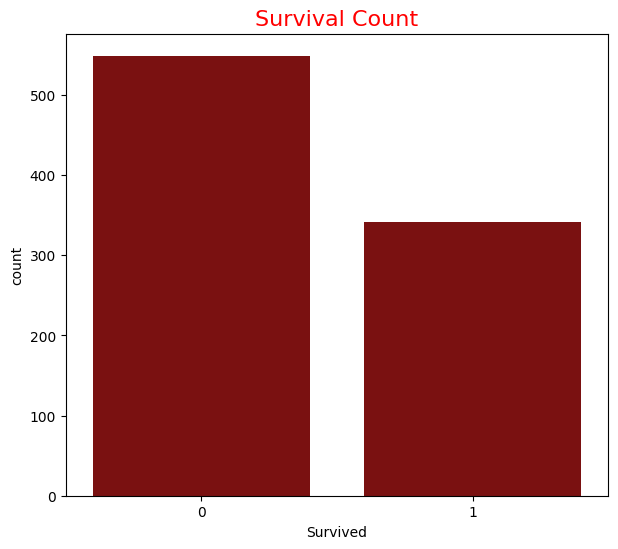

In [15]:
# visualize Survival Counts
plt.figure(figsize=(7,6))
sns.barplot(df['Survived'].value_counts(),color= 'darkred')
plt.title('Survival Count',fontsize = 16 ,color = 'red')
plt.show()

##### This graph show the people are Survived and non Survived and Here  0 == not Survived 1 == Survived

## Survived From Male and Female 

Text(0.5, 1.0, 'Survival Counts by Gender')

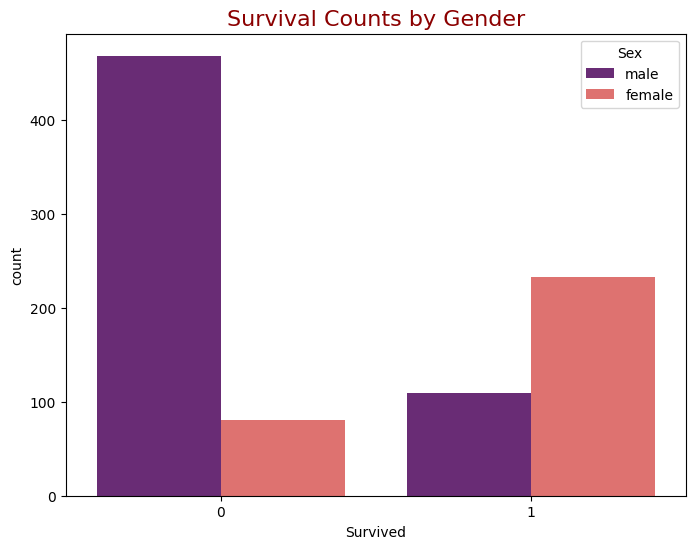

In [16]:
#  Survival Countplot vs Sex 
plt.figure(figsize= (8,6))
sns.countplot(x='Survived', hue= 'Sex', data = df,palette= "magma")
plt.title("Survival Counts by Gender" ,fontsize = 16 ,color = 'darkred')

##### From this graph We can see the  number of Survived and Non-Survived from Male and Female

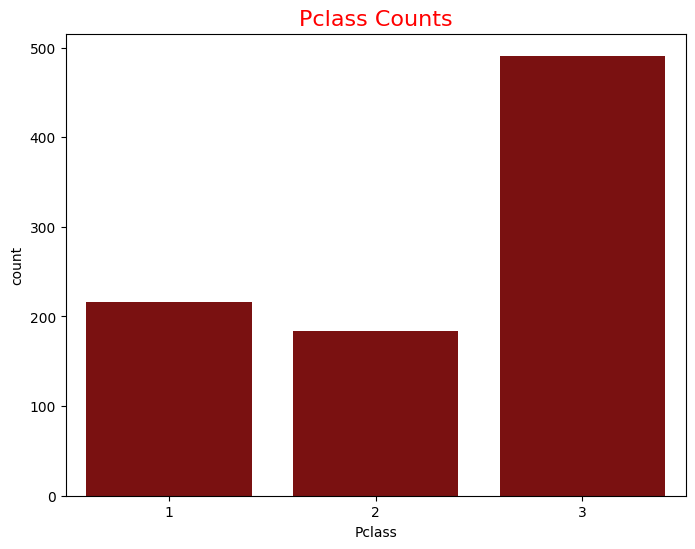

In [17]:
plt.figure(figsize=(8,6))
sns.barplot(df['Pclass'].value_counts(),color= 'darkred')
plt.title("Pclass Counts", fontsize = 16 ,color = 'red')
plt.show()

## Survived From Pclass

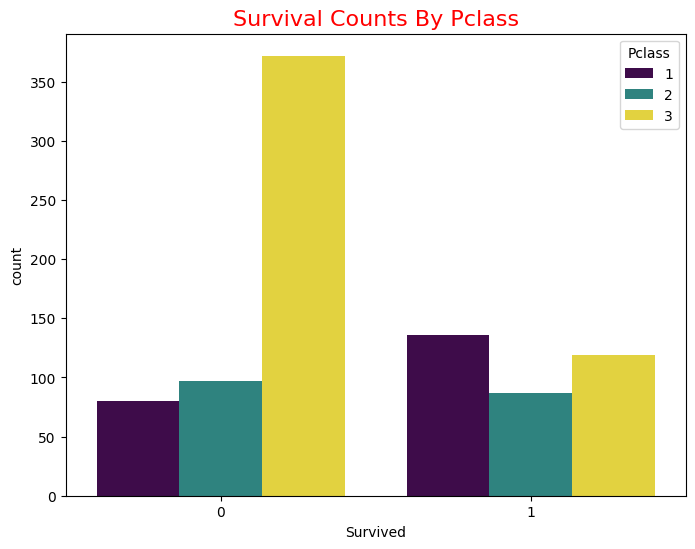

In [18]:
# Survival Counts by Pclass 
plt.figure(figsize=(8,6))
sns.countplot(x=('Survived'), hue= "Pclass",data= df ,palette='viridis' )
plt.title("Survival Counts By Pclass",fontsize = 16,color = 'red')
plt.show()

##### From this graph We can see the number of Survived and Non-Survived from Pclass

In [19]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Survived From SibSp

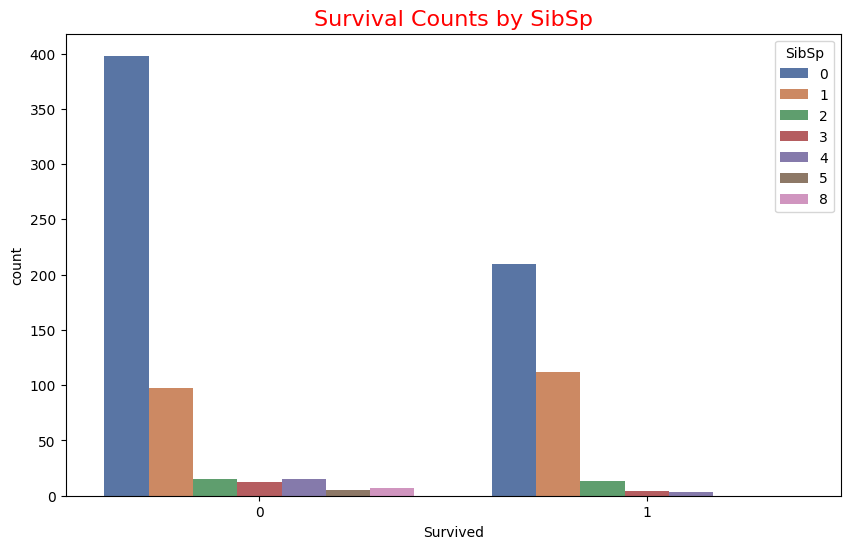

In [20]:
# Survival Counts by SibSp
plt.figure(figsize=(10,6))
sns.countplot(x = 'Survived', hue= 'SibSp', data= df , palette= 'deep')
plt.title("Survival Counts by SibSp", fontsize = 16 , color = 'red')
plt.show()

##### From this graph We can see the number of Survived and Non-Survived from SibSp

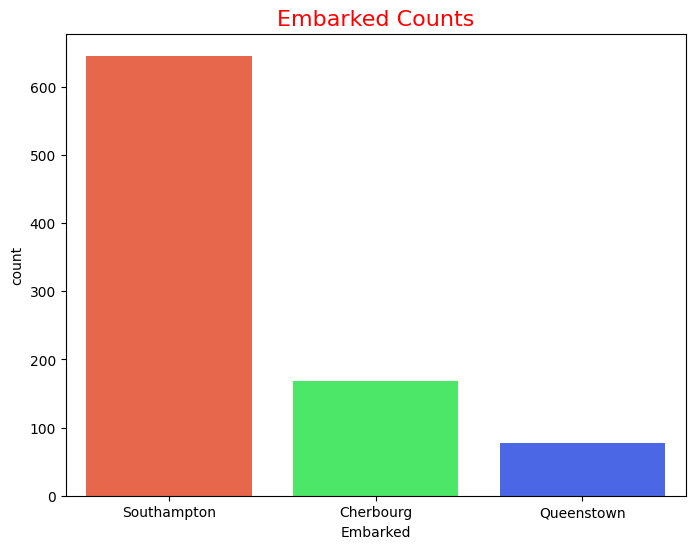

In [21]:
# Embarked Counts
plt.figure(figsize=(8,6))
sns.countplot(x= 'Embarked',hue= 'Embarked',data = df, palette=['#FF5733','#33FF57','#3357FF'])
plt.xticks(ticks=[0,1,2],labels= ["Southampton","Cherbourg","Queenstown"])
plt.title("Embarked Counts", fontsize = 16, color = 'red')
plt.show()

In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Text(0.5, 1.0, 'Age Distribution')

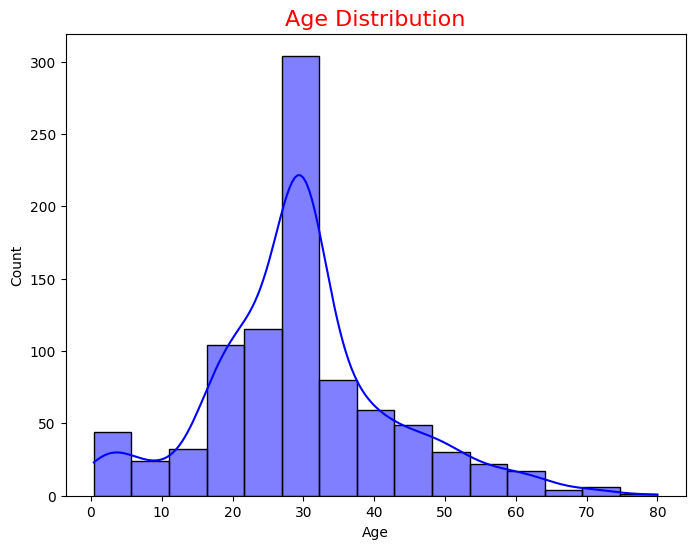

In [23]:
# Age Distribution with KDE ( Kernel Density Estimation )
plt.figure(figsize=(8,6))
sns.histplot(df['Age'],bins= 15, kde= True, color= 'blue')
plt.title("Age Distribution",fontsize = 16,color = 'red')

In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Text(0.5, 1.0, 'Fare Distribution')

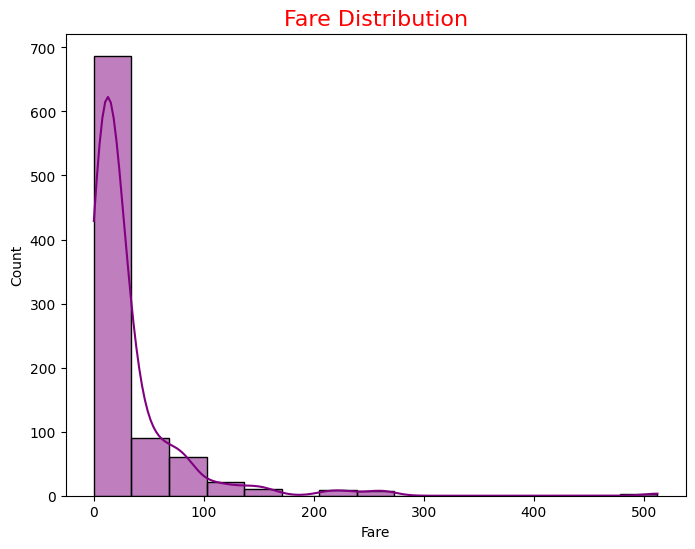

In [25]:
# Fare Distribution
plt.figure(figsize=(8,6))
sns.histplot(df['Fare'],bins=15,kde = True , color = 'purple')
plt.title("Fare Distribution",fontsize = 16, color = 'red')

### Let's see the correlation between variables 

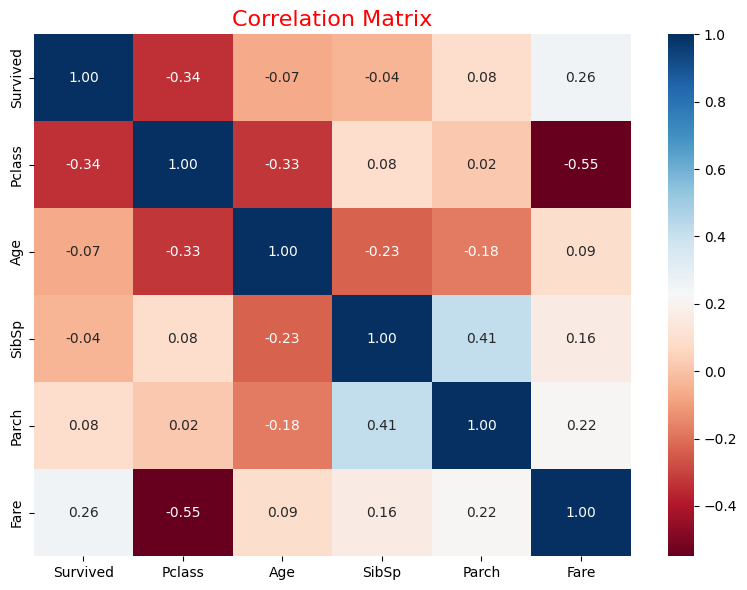

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns=['Sex','Embarked']).corr(), annot= True, cmap= 'RdBu', fmt= '.2f')
plt.title("Correlation Matrix", fontsize = 16 , color = 'red')
plt.tight_layout()
plt.show()

# Train Test Split 

In [27]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [28]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [29]:
## Encode categorical variables
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
df["Embarked"] = LabelEncoder().fit_transform(df['Embarked'])

##### male = 1 & female = 0 
##### C , Q , S = 0 , 1 , 2

In [30]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [31]:
x = df.drop(columns =["Survived"])
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [32]:
y = df[['Survived']]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


### Split data set

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.2 , random_state= 42)

In [34]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.500000,0,0,28.5000,2
733,2,1,23.000000,0,0,13.0000,2
382,3,1,32.000000,0,0,7.9250,2
704,3,1,26.000000,1,0,7.8542,2
813,3,0,6.000000,4,2,31.2750,2
...,...,...,...,...,...,...,...
106,3,0,21.000000,0,0,7.6500,2
270,1,1,29.699118,0,0,31.0000,2
860,3,1,41.000000,2,0,14.1083,2
435,1,0,14.000000,1,2,120.0000,2


In [35]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,29.699118,1,1,15.2458,0
439,2,1,31.000000,0,0,10.5000,2
840,3,1,20.000000,0,0,7.9250,2
720,2,0,6.000000,0,1,33.0000,2
39,3,0,14.000000,1,0,11.2417,0
...,...,...,...,...,...,...,...
433,3,1,17.000000,0,0,7.1250,2
773,3,1,29.699118,0,0,7.2250,0
25,3,0,38.000000,1,5,31.3875,2
84,2,0,17.000000,0,0,10.5000,2


In [36]:
y_train

,Survived
331,0
733,0
382,0
704,0
813,0
...,...
106,1
270,0
860,0
435,1


In [37]:
y_test

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1


### Scale Numerical feature 

In [38]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Train Logistic Regression Model

In [39]:
logistic_Model = LogisticRegression()
logistic_Model.fit(x_train,y_train)

C:\Users\ACT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

# Prediction and Evaluation 

In [40]:
logistic_Model.score(x_test,y_test)

0.8100558659217877

In [41]:
logistic_Model.score(x_train,y_train)

0.8019662921348315

In [42]:
y_pred = logistic_Model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)

In [43]:
print(f" Accuracy Score is {accuracy*100:.2f}%")

 Accuracy Score is 81.01%


In [44]:
print("Classification Report is :\n",report)

Classification Report is :
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



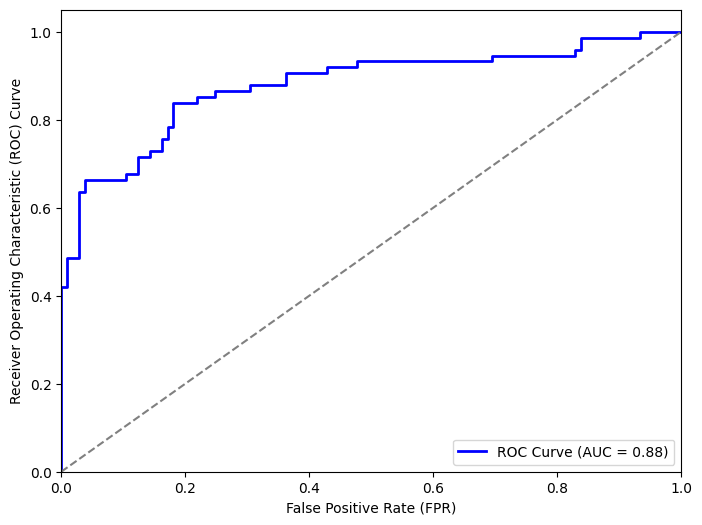

In [45]:
from sklearn.metrics import roc_curve,auc
# Get positive score for the positive class 
y_probs = logistic_Model.predict_proba(x_test)[:,1]

# Compute ROC curve and AUC score 
fpr , tpr,_ = roc_curve(y_test,y_probs)
roc_auc = auc(fpr,tpr)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color = 'blue', lw = 2 , label = f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1], color = 'gray', linestyle = "--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc = 'lower right')
plt.show()

##### Since AUC = 0.88 , the model effectively predicts on the Titanic . The curve being well above the diagonal ( random classifier ) suggest that the model has a high True Positive Rate while maintaining a low False Positive Rate. This means the logistic regression model is performing well in classification. 